In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [130]:
cols = ['name', 'rating', 'genre', 'year', 'score', 'votes', 'star', 'country','gross', 'company', 'runtime']
df = df[cols]
df = df.dropna()
df.isnull().sum()

name       0
rating     0
genre      0
year       0
score      0
votes      0
star       0
country    0
gross      0
company    0
runtime    0
dtype: int64

In [131]:
df.dtypes

name        object
rating      object
genre       object
year         int64
score      float64
votes      float64
star        object
country     object
gross      float64
company     object
runtime    float64
dtype: object

<AxesSubplot:>

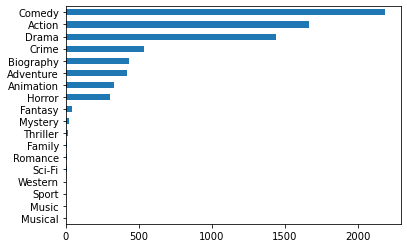

In [132]:
df['genre'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='score', ylabel='gross'>

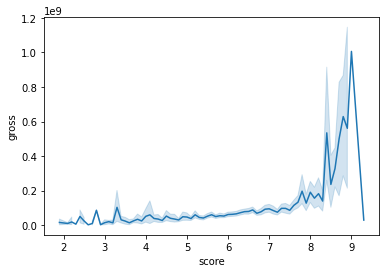

In [133]:
sns.lineplot(data=df, x='score', y='gross')

In [134]:
comedy_movies = df[df['genre']=='Comedy'].sort_values(by=['score'], ascending=True)
comedy_movies = comedy_movies[comedy_movies['country']=='India']
comedy_movies

,name,rating,genre,year,score,votes,star,country,gross,company,runtime
7597,Luka Chuppi,Not Rated,Comedy,2019,6.3,9000.0,Kartik Aaryan,India,14256199.0,Maddock Films,126.0
7598,De De Pyaar De,Not Rated,Comedy,2019,6.6,7400.0,Ajay Devgn,India,1473116.0,Luv Films,135.0
4013,Monsoon Wedding,R,Comedy,2001,7.4,24000.0,Naseeruddin Shah,India,30787356.0,IFC Productions,114.0
4363,Kal Ho Naa Ho,Not Rated,Comedy,2003,7.9,65000.0,Preity Zinta,India,13200241.0,Dharma Productions,186.0
5224,Jab We Met,Not Rated,Comedy,2007,7.9,49000.0,Shahid Kapoor,India,10065630.0,Shree Ashtavinayak Cine Vision,138.0
3975,Dil Chahta Hai,Not Rated,Comedy,2001,8.1,68000.0,Aamir Khan,India,316221.0,Excel Entertainment,183.0
5018,Rang De Basanti,Not Rated,Comedy,2006,8.1,115000.0,Aamir Khan,India,10800778.0,ROMP,167.0
6558,PK,Not Rated,Comedy,2014,8.1,169000.0,Aamir Khan,India,100370104.0,Rajkumar Hirani Films,153.0
6225,Barfi!,Not Rated,Comedy,2012,8.1,78000.0,Ranbir Kapoor,India,4490134.0,UTV Motion Pictures,151.0
5926,Zindagi Na Milegi Dobara,Not Rated,Comedy,2011,8.2,71000.0,Hrithik Roshan,India,5192743.0,Eros Worldwide,155.0


<AxesSubplot:xlabel='score', ylabel='gross'>

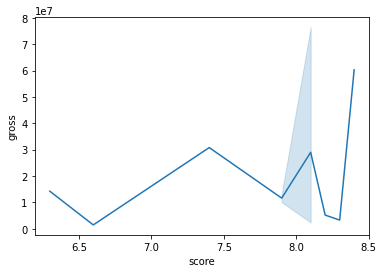

In [135]:
sns.lineplot(data=comedy_movies, x='score', y='gross')